## Importing Tools 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Load Data 🫰🎯

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
# random sample of 3 rows from 'df'
df.sample(2) 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
235,714335368144257108,Rental unit in Albany · 1 bedroom · 1 bed · 1 ...,9318285,Mesut,NaN,TENTH WARD,42.658930,-73.784370,Private room,50.0,2,1,2022-09-22,0.06,1,352,0,NaN
374,1004978540001566331,Home in Albany · 3 bedrooms · 2 beds · 2 baths,31318080,Cindy,NaN,EIGHTH WARD,42.655498,-73.810657,Private room,200.0,1,0,NaN,NaN,1,261,0,NaN


In [4]:
# Print information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              410 non-null    int64  
 1   name                            410 non-null    object 
 2   host_id                         410 non-null    int64  
 3   host_name                       410 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   410 non-null    object 
 6   latitude                        410 non-null    float64
 7   longitude                       410 non-null    float64
 8   room_type                       410 non-null    object 
 9   price                           404 non-null    float64
 10  minimum_nights                  410 non-null    int64  
 11  number_of_reviews               410 non-null    int64  
 12  last_review                     361 

## Data Preprocessing 🔎⚔️

In [5]:
df['name'].tolist()

['Home in Albany · ★4.74 · 1 bedroom · 1 bed · 1 private bath',
 'Rental unit in Albany · ★3.56 · 2 bedrooms · 2 beds · 1 bath',
 'Rental unit in Albany · ★4.74 · 1 bedroom · 1 bed · 1 bath',
 'Rental unit in Albany · ★4.51 · Studio · 1 bed · 1 bath',
 'Rental unit in Albany · ★4.73 · 1 bedroom · 1 bed · 1 bath',
 'Townhouse in Albany · ★4.59 · 1 bedroom · 1 bed · 2 shared baths',
 'Home in Albany · ★4.76 · 3 bedrooms · 3 beds · 3.5 baths',
 'Home in Albany · ★4.61 · 1 bedroom · 1 bed · 2.5 shared baths',
 'Home in Albany · ★4.88 · 5 bedrooms · 6 beds · 5 baths',
 'Rental unit in Albany · ★4.74 · 1 bedroom · 1 bed · 1 bath',
 'Rental unit in Albany · ★4.79 · 1 bedroom · 2 beds · 1 bath',
 'Rental unit in Albany · ★4.53 · 1 bedroom · 2 beds · 1 private bath',
 'Home in Albany · ★4.81 · 1 bedroom · 1 bed · 1 bath',
 'Place to stay in Albany · ★4.94 · 3 bedrooms · 6 beds · 2 baths',
 'Home in Albany · ★4.83 · 1 bedroom · 1 bed · 1.5 shared baths',
 'Home in Albany · ★4.61 · 1 bedroom · 1 

In [6]:
# check for column type
df['name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 410 entries, 0 to 409
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
410 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


In [7]:
# This line fills any missing (NaN) values in the 'name' column with an empty string
df['name'] = df['name'].fillna('')

# Convert all values to strings
df['name'] = df['name'].astype(str)

# Split the 'name' column
df['name'] = df['name'].str.split('·')

# Extract specific elements
df['home_type'] = df['name'].apply(lambda x: x[0].strip() if len(x) > 0 else None)
df['rating'] = df['name'].apply(lambda x: x[1].split('★')[1].strip() if len(x) > 1 and '★' in x[1] else None)
df['bedroom_info'] = df['name'].apply(lambda x: x[2].strip() if len(x) > 2 else None)
df['bed_info'] = df['name'].apply(lambda x: x[3].strip() if len(x) > 3 else '')
df['bath_type'] = df['name'].apply(lambda x: x[4].strip() if len(x) > 4 else None)

In [8]:
# Set 'id' and 'host_id' as the DataFrame's index, modifying the DataFrame in-place 
df.set_index(['id','host_id'],inplace=True)

In [9]:
# Count the number of missing values (NaN) in each column of the DataFrame 
df.isnull().sum()

name                                0
host_name                           0
neighbourhood_group               410
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               6
minimum_nights                      0
number_of_reviews                   0
last_review                        49
reviews_per_month                  49
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                           410
home_type                           0
rating                             62
bedroom_info                        0
bed_info                            0
bath_type                          66
dtype: int64

In [10]:
drop = df.drop(['neighbourhood_group','license'], axis=1 ,inplace=True)

In [11]:
# Fill missing values in 'price' column with the mean
df['price'] = df['price'].fillna(df['price'].mean())

In [12]:
# Count the frequency of each unique value in the 'last_review' column
df['last_review'].value_counts()

last_review
2023-12-03    19
2023-12-28    11
2024-01-01    10
2023-12-29    10
2023-12-30     9
              ..
2023-01-28     1
2020-03-04     1
2023-02-23     1
2023-03-31     1
2023-12-09     1
Name: count, Length: 158, dtype: int64

In [13]:
# Fill missing values in 'last_review' column with '2023-01-28' only if the column is not empty
if not df['last_review'].empty:
    df['last_review'] = df['last_review'].fillna('2023-01-28')

In [14]:
df['last_review'].isna().value_counts()

last_review
False    410
Name: count, dtype: int64

In [15]:
# Count the frequency of each unique value in the 'last_review' column
df['last_review'].value_counts()

last_review
2023-01-28    50
2023-12-03    19
2023-12-28    11
2024-01-01    10
2023-12-29    10
              ..
2020-07-03     1
2020-03-04     1
2020-04-24     1
2023-02-23     1
2023-12-09     1
Name: count, Length: 158, dtype: int64

In [16]:
df['last_review'].isnull().sum()

0

In [17]:
df['reviews_per_month'].isna().sum()

49

In [18]:
df['reviews_per_month'].value_counts()

reviews_per_month
1.00    6
0.14    5
0.21    5
0.18    5
0.29    5
       ..
2.17    1
5.78    1
6.73    1
0.25    1
1.36    1
Name: count, Length: 247, dtype: int64

In [19]:
if not df['reviews_per_month'].empty:
    df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].min())

In [20]:
df['reviews_per_month'].value_counts()

reviews_per_month
0.02    50
1.00     6
0.29     5
0.31     5
0.14     5
        ..
5.78     1
6.73     1
0.25     1
1.44     1
1.36     1
Name: count, Length: 247, dtype: int64

In [21]:
df['reviews_per_month'].isna().sum()

0

In [22]:
if not df['rating'].astype(str).empty:
    # Convert 'rating' column to numeric, handling errors by setting them to NaN
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    
    # Fill missing values in 'rating' with the minimum non-missing value
    df['rating'] = df['rating'].fillna(df['rating'].min())


In [23]:
df['bath_type'] = df['bath_type'].fillna('Not specified')

In [24]:
df['bath_type'].value_counts()

bath_type
1 bath              208
Not specified        66
1 shared bath        38
2 baths              27
1 private bath       21
1.5 baths            14
1.5 shared baths     12
2 shared baths       10
3.5 baths             4
3 baths               3
3 shared baths        2
2.5 shared baths      1
5 baths               1
5.5 baths             1
2.5 baths             1
Half-bath             1
Name: count, dtype: int64

In [25]:
# Count the total number of missing values (NaN) across all columns in the DataFrame
df.isna().sum()

name                              0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
home_type                         0
rating                            0
bedroom_info                      0
bed_info                          0
bath_type                         0
dtype: int64

## Data Exploratory

In [26]:
df['price'].value_counts()

price
50.0     12
120.0    12
99.0     12
115.0    11
125.0    10
         ..
47.0      1
180.0     1
83.0      1
179.0     1
58.0      1
Name: count, Length: 143, dtype: int64

In [27]:
df['neighbourhood'].value_counts()

neighbourhood
SIXTH WARD         87
SECOND WARD        49
TENTH WARD         41
THIRD WARD         38
NINTH WARD         36
FOURTEENTH WARD    34
THIRTEENTH WARD    30
SEVENTH WARD       17
FIFTEENTH WARD     16
ELEVENTH WARD      16
FOURTH WARD        13
EIGHTH WARD         9
FIRST WARD          9
FIFTH WARD          8
TWELFTH WARD        7
Name: count, dtype: int64

In [28]:
df['room_type'].value_counts()

room_type
Entire home/apt    286
Private room       123
Shared room          1
Name: count, dtype: int64

In [29]:
df['minimum_nights'].value_counts()

minimum_nights
1      197
2      101
3       35
4       19
30      13
5        9
7        9
10       8
13       5
14       4
6        3
180      1
90       1
70       1
365      1
60       1
28       1
15       1
Name: count, dtype: int64

In [30]:
df['number_of_reviews'].value_counts()

number_of_reviews
0      49
1      26
5      17
4      15
2      15
       ..
66      1
107     1
104     1
428     1
239     1
Name: count, Length: 140, dtype: int64

In [31]:
df['last_review'].value_counts()

last_review
2023-01-28    50
2023-12-03    19
2023-12-28    11
2024-01-01    10
2023-12-29    10
              ..
2020-07-03     1
2020-03-04     1
2020-04-24     1
2023-02-23     1
2023-12-09     1
Name: count, Length: 158, dtype: int64

In [32]:
df['reviews_per_month'].value_counts()

reviews_per_month
0.02    50
1.00     6
0.29     5
0.31     5
0.14     5
        ..
5.78     1
6.73     1
0.25     1
1.44     1
1.36     1
Name: count, Length: 247, dtype: int64

In [33]:
df['calculated_host_listings_count'].value_counts()

calculated_host_listings_count
1     124
3      51
2      48
6      42
8      32
4      28
10     20
19     19
15     15
12     12
5      10
9       9
Name: count, dtype: int64

In [34]:
df['availability_365'].value_counts()

availability_365
0      70
365    24
364    11
358     8
269     7
       ..
293     1
280     1
85      1
112     1
148     1
Name: count, Length: 153, dtype: int64

In [35]:
df['number_of_reviews_ltm'].value_counts()

number_of_reviews_ltm
0     80
1     36
3     26
2     26
6     14
      ..
69     1
46     1
57     1
45     1
48     1
Name: count, Length: 74, dtype: int64

In [36]:
df['bed_info'].value_counts()

bed_info
1 bed               182
2 beds               89
3 beds               39
1 bath               38
4 beds               18
5 beds                9
2 baths               7
1 shared bath         6
6 beds                5
1 private bath        4
1.5 baths             3
7 beds                2
                      2
1.5 shared baths      2
7 baths               1
0 shared baths        1
2 shared baths        1
3.5 baths             1
Name: count, dtype: int64

In [37]:
df['bedroom_info'].value_counts()

bedroom_info
1 bedroom     206
2 bedrooms     77
3 bedrooms     33
1 bed          31
2 beds         16
4 bedrooms     12
Studio         11
5 bedrooms      9
3 beds          4
5 beds          3
4 beds          3
Half-bath       1
1 bath          1
8 beds          1
12 beds         1
10 beds         1
Name: count, dtype: int64

In [38]:
df['home_type'].value_counts()

home_type
Rental unit in Albany           212
Home in Albany                  129
Townhouse in Albany              18
Hotel in Albany                  11
Condo in Albany                   8
Bed and breakfast in Albany       8
Guest suite in Albany             6
Vacation home in Albany           5
Loft in Albany                    3
Place to stay in Albany           2
Serviced apartment in Albany      2
Boutique hotel in Albany          2
Aparthotel in Albany              1
Cottage in Albany                 1
Guesthouse in Albany              1
Villa in Albany                   1
Name: count, dtype: int64

In [39]:
df['rating'].value_counts()

rating
3.25    90
5.00    56
4.95    13
4.90    11
4.92    11
        ..
4.62     1
4.20     1
3.56     1
3.96     1
3.40     1
Name: count, Length: 66, dtype: int64

In [40]:
df['bath_type'].value_counts()

bath_type
1 bath              208
Not specified        66
1 shared bath        38
2 baths              27
1 private bath       21
1.5 baths            14
1.5 shared baths     12
2 shared baths       10
3.5 baths             4
3 baths               3
3 shared baths        2
2.5 shared baths      1
5 baths               1
5.5 baths             1
2.5 baths             1
Half-bath             1
Name: count, dtype: int64

#  Data Visualization 📊

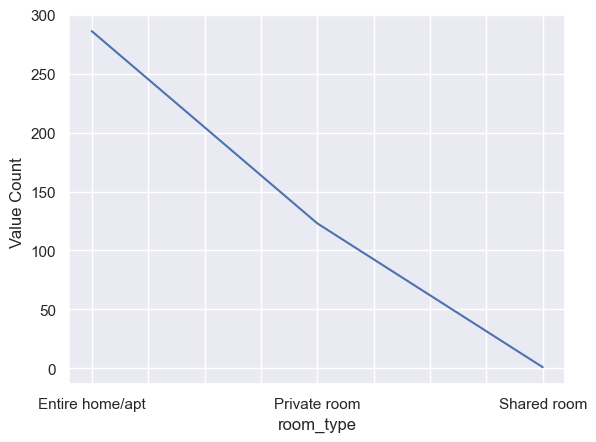

In [41]:
df['room_type'].value_counts().plot(kind='line')
plt.ylabel('Value Count ')
plt.show()

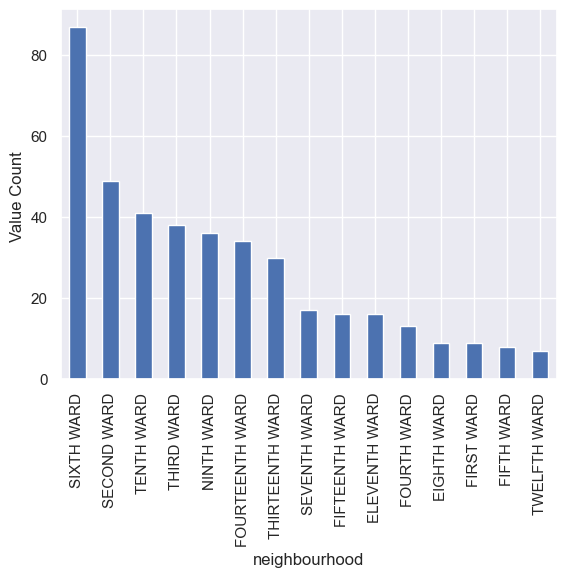

In [42]:
df['neighbourhood'].value_counts().plot(kind='bar')
plt.ylabel('Value Count ')
plt.xticks(rotation=90)
plt.show()

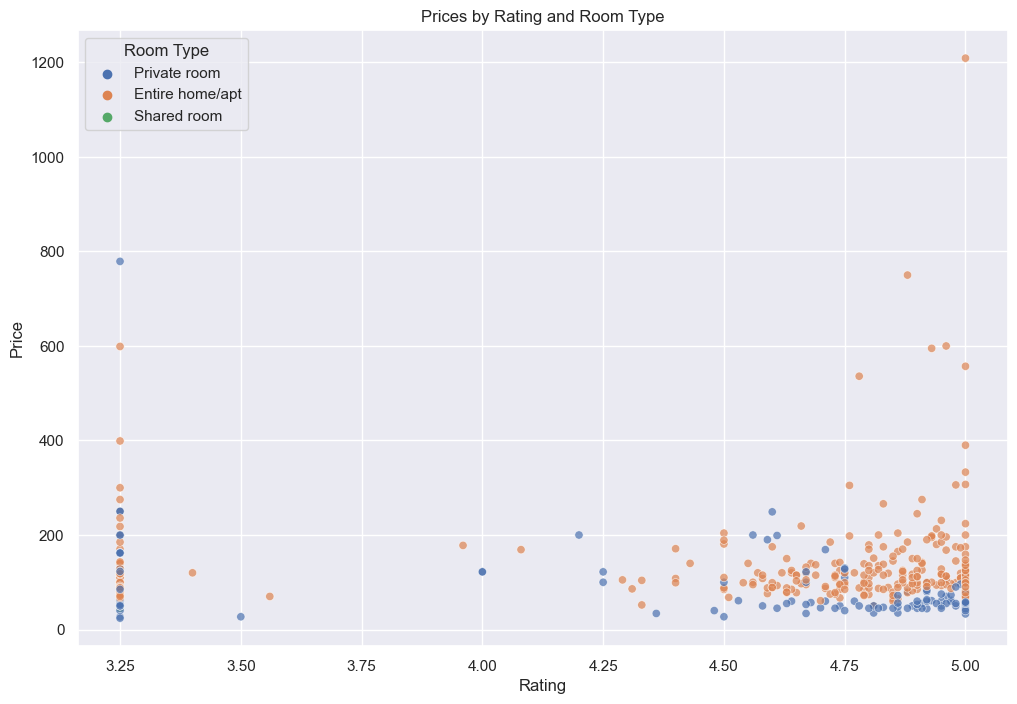

In [43]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='rating', y='price', hue='room_type', data=df, alpha=0.7)
plt.title('Prices by Rating and Room Type')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.legend(title='Room Type')

plt.show()


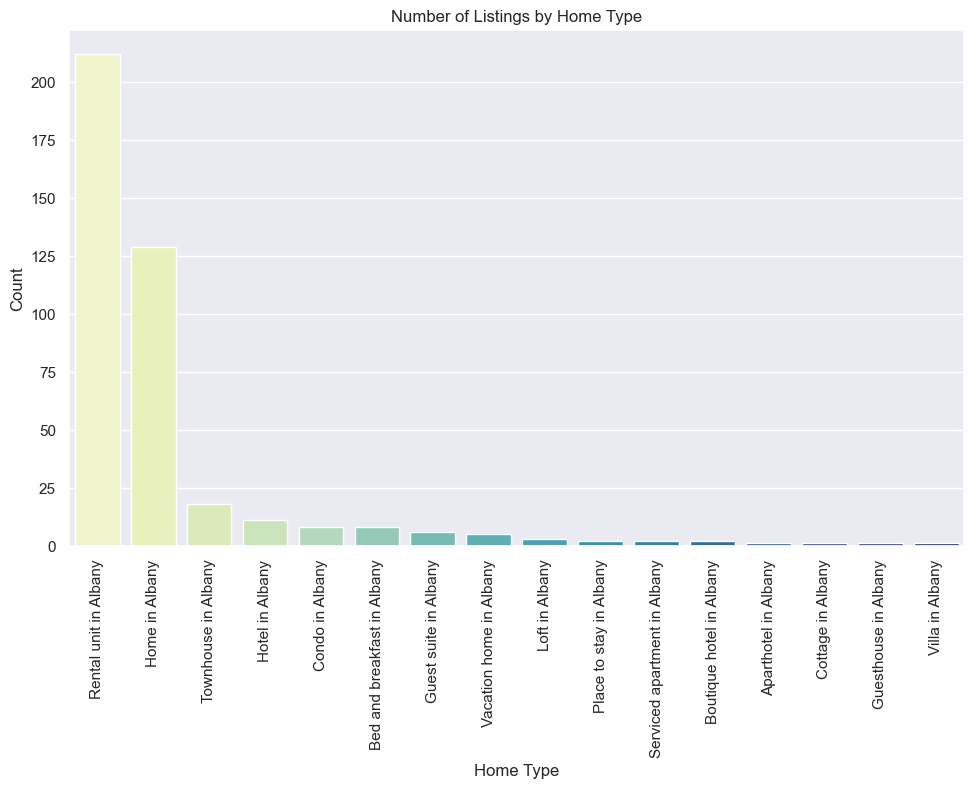

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
count_by_home_type = df['home_type'].value_counts()
sns.barplot(x=count_by_home_type.index, y=count_by_home_type.values, palette='YlGnBu', ax=ax)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Number of Listings by Home Type')
plt.xlabel('Home Type')
plt.ylabel('Count')
plt.show()

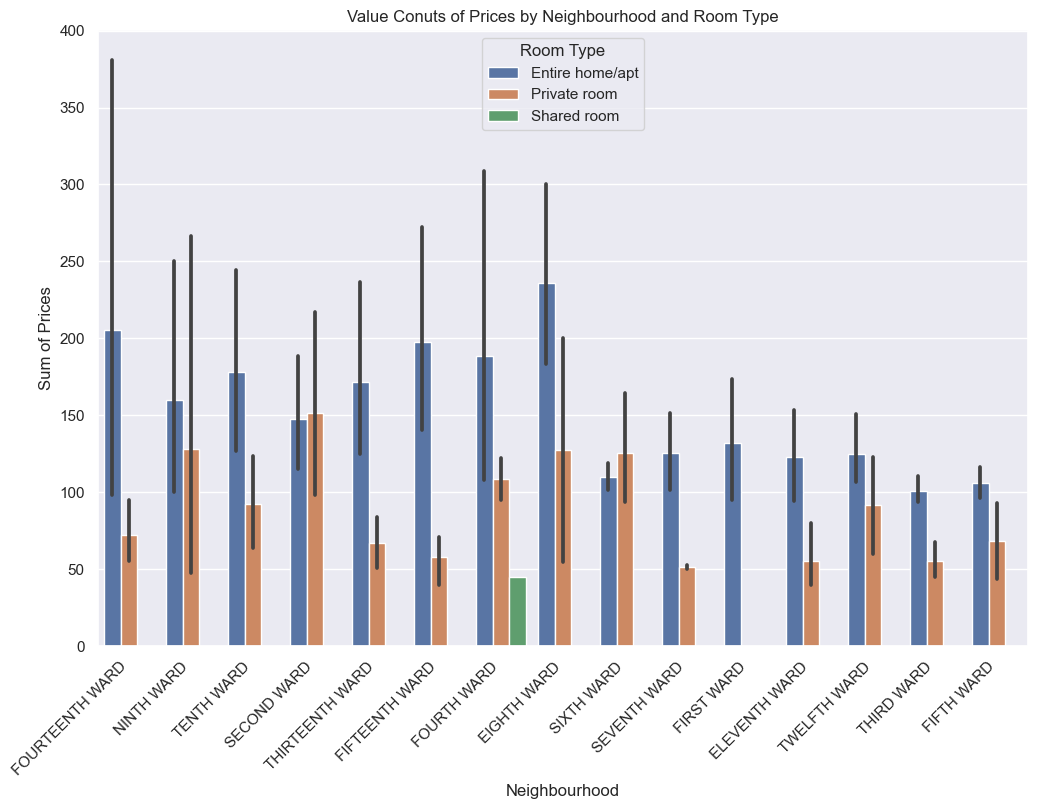

In [45]:
grouped_data = df.groupby(['neighbourhood', 'room_type'])['price'].value_counts().reset_index()

grouped_data = grouped_data.sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood', y='price', hue='room_type', data=grouped_data)
plt.title('Value Conuts of Prices by Neighbourhood and Room Type')
plt.xlabel('Neighbourhood')
plt.ylabel('Sum of Prices')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Room Type')

plt.show()


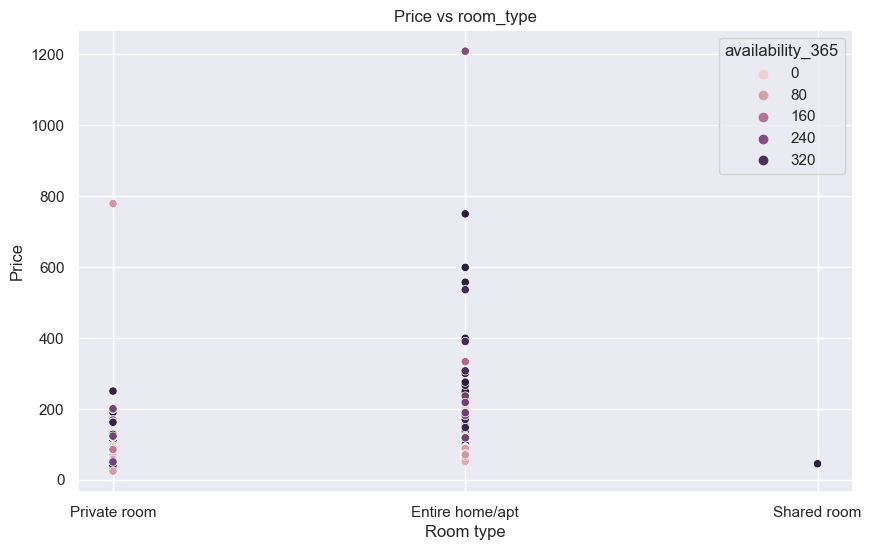

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='room_type', y='price', hue='availability_365', data=df)
plt.title('Price vs room_type')
plt.xlabel('Room type')
plt.ylabel('Price')
plt.legend(title='availability_365')
plt.show()

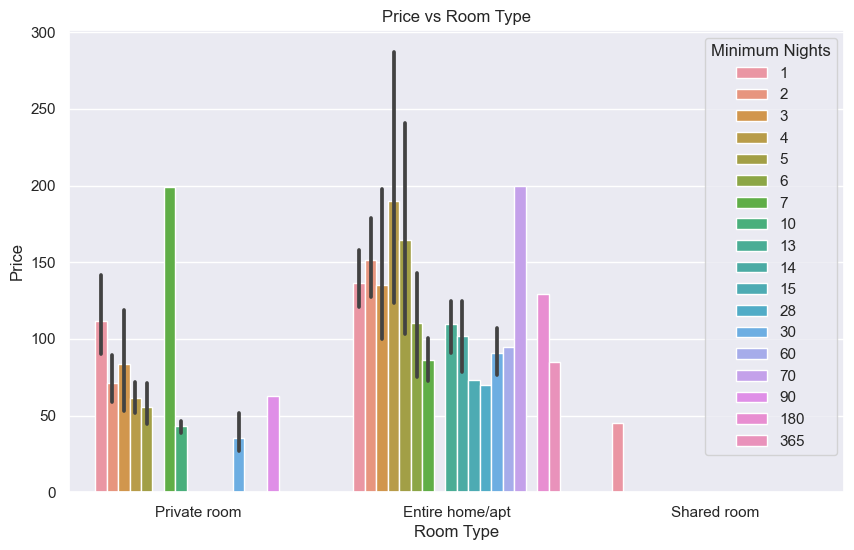

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', hue='minimum_nights', data=df)
plt.title('Price vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.legend(title='Minimum Nights')
plt.show()

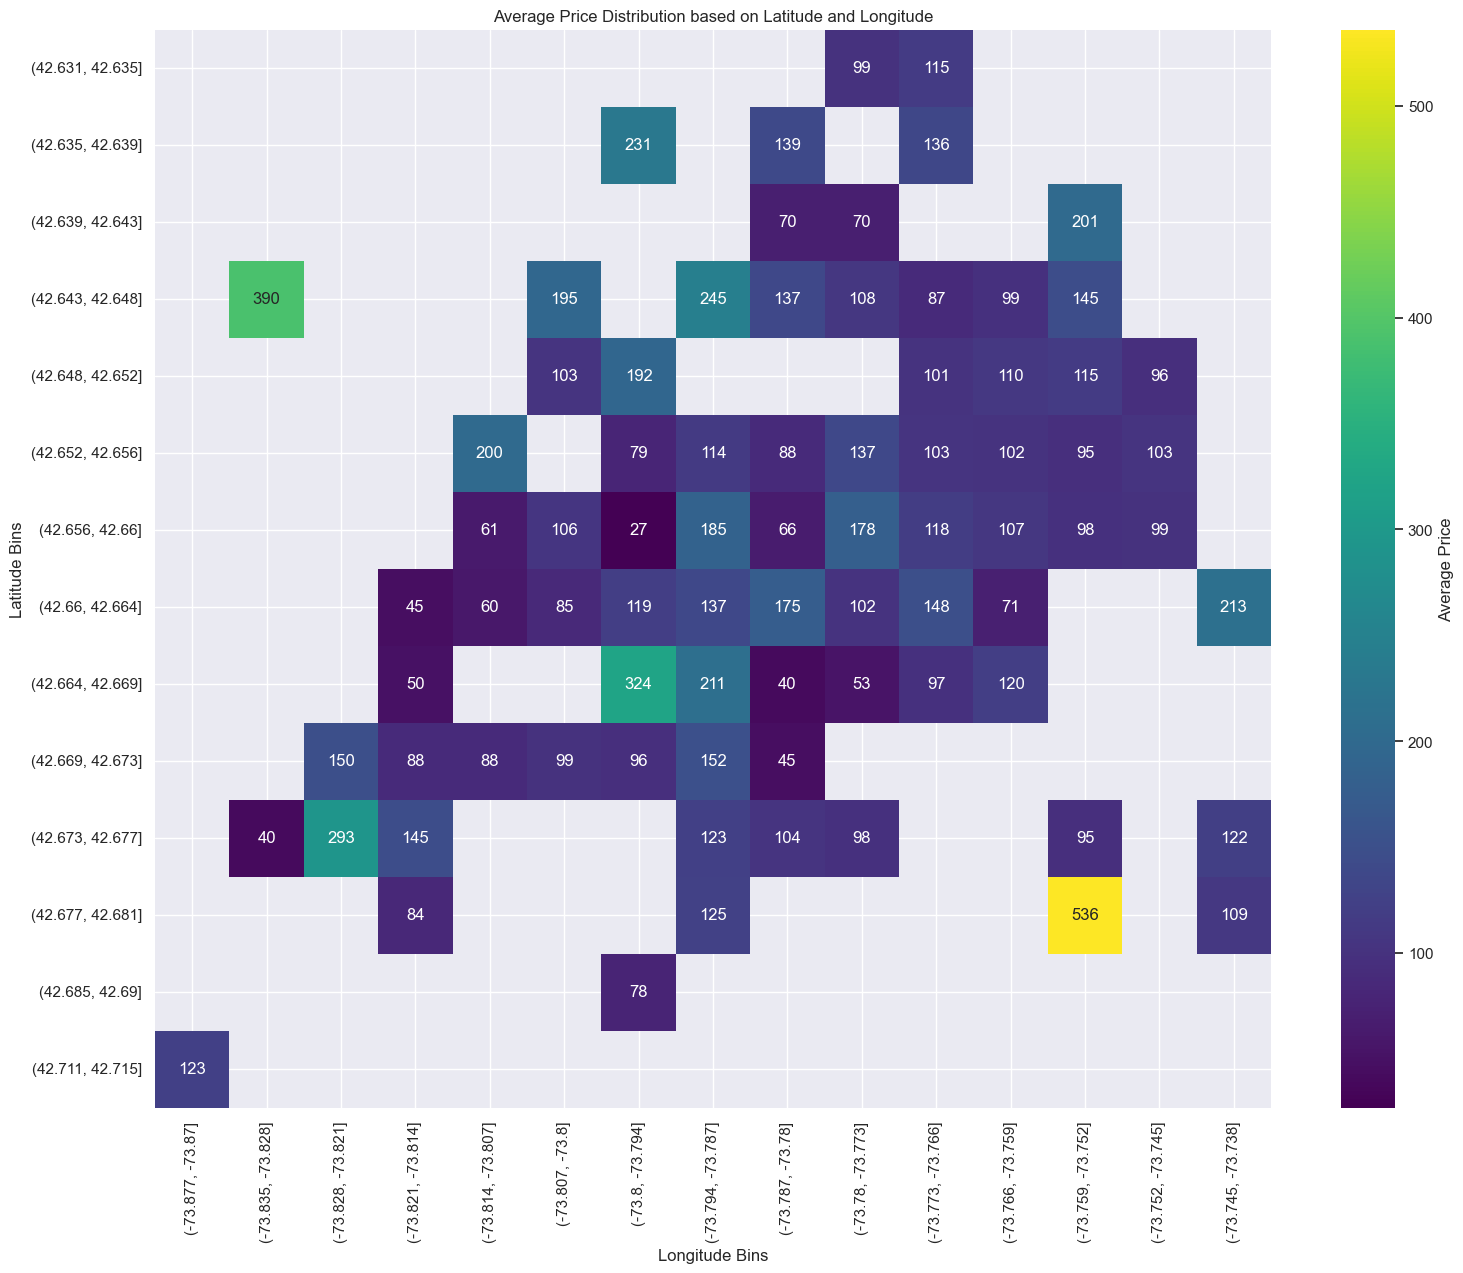

In [48]:
# Create latitude and longitude bins
latitude_bins = pd.cut(df['latitude'], bins=20)
longitude_bins = pd.cut(df['longitude'], bins=20)

# Group by latitude and longitude bins, calculate the average price
grouped_data = df.groupby([latitude_bins, longitude_bins])['price'].mean().reset_index()

# Reshape the data for the bar plot
pivot_data = grouped_data.pivot_table(values='price', index='latitude', columns='longitude')

# Plotting the bar plot
plt.figure(figsize=(18, 14))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt=".0f", cbar_kws={'label': 'Average Price'})
plt.title('Average Price Distribution based on Latitude and Longitude')
plt.xlabel('Longitude Bins')
plt.ylabel('Latitude Bins')

# Show the plot
plt.show()

In [49]:
# Convert 'last_review' column to datetime format 
df['last_review'] = pd.to_datetime(df['last_review'])

In [50]:
# Extract the year from the 'last_review' column (assuming it's a datetime format) and store it in a new column named 'year'
df['year'] = df['last_review'].dt.year

In [51]:
# Add month names as a new column 'month' based on the month values in 'last_review'
df['month'] = df['last_review'].dt.month_name()

In [52]:
# Add 'day' column with day names from 'last_review' dates
df['day'] = df['last_review'].dt.day_name()

In [53]:
# Add a 'quarter' column with the quarter extracted from the 'last_review' dates
df['qurter'] = df['last_review'].dt.quarter

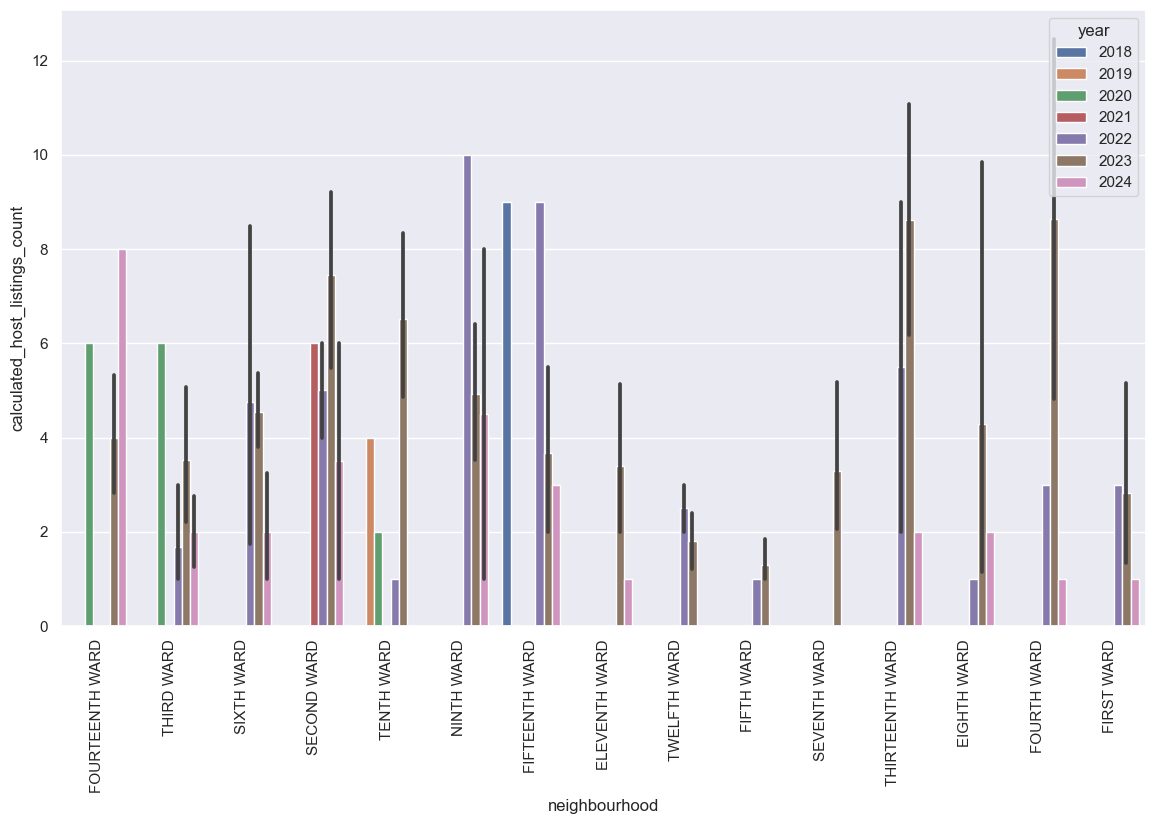

In [54]:
plt.figure(figsize=(14,8))
sns.barplot(data=df ,x= 'neighbourhood', y ='calculated_host_listings_count' ,hue='year')
plt.xticks(rotation=90)
plt.show()

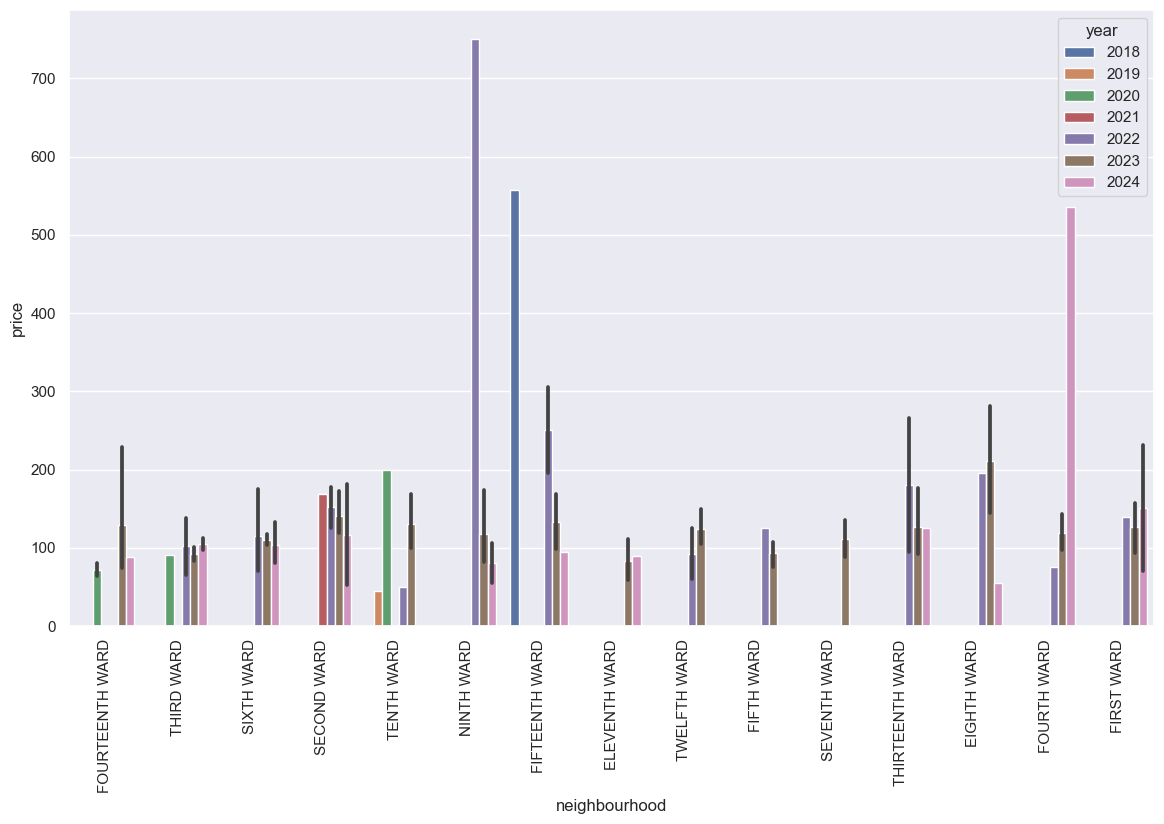

In [55]:
plt.figure(figsize=(14,8))
sns.barplot(data=df ,x= 'neighbourhood', y ='price' ,hue='year')
plt.xticks(rotation=90)
plt.show()

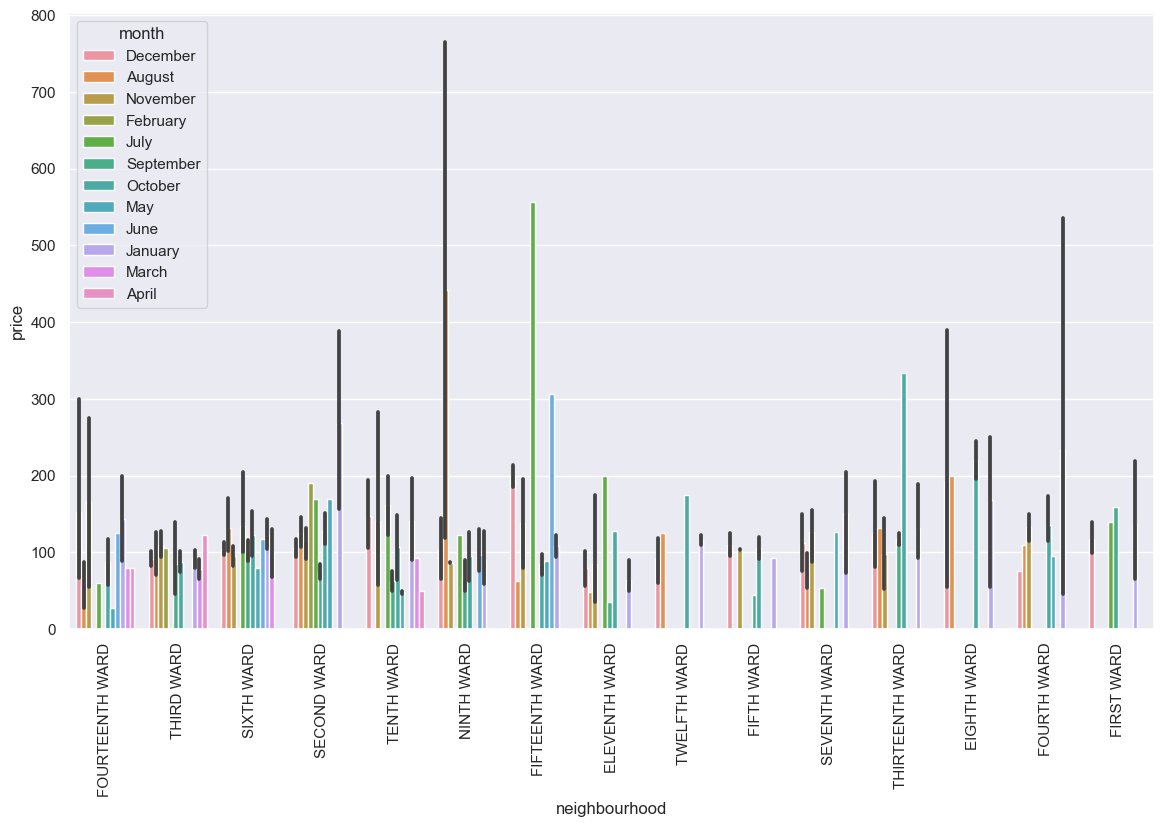

In [56]:
plt.figure(figsize=(14,8))
sns.barplot(data=df ,x= 'neighbourhood', y ='price' ,hue='month')
plt.xticks(rotation=90)
plt.show()

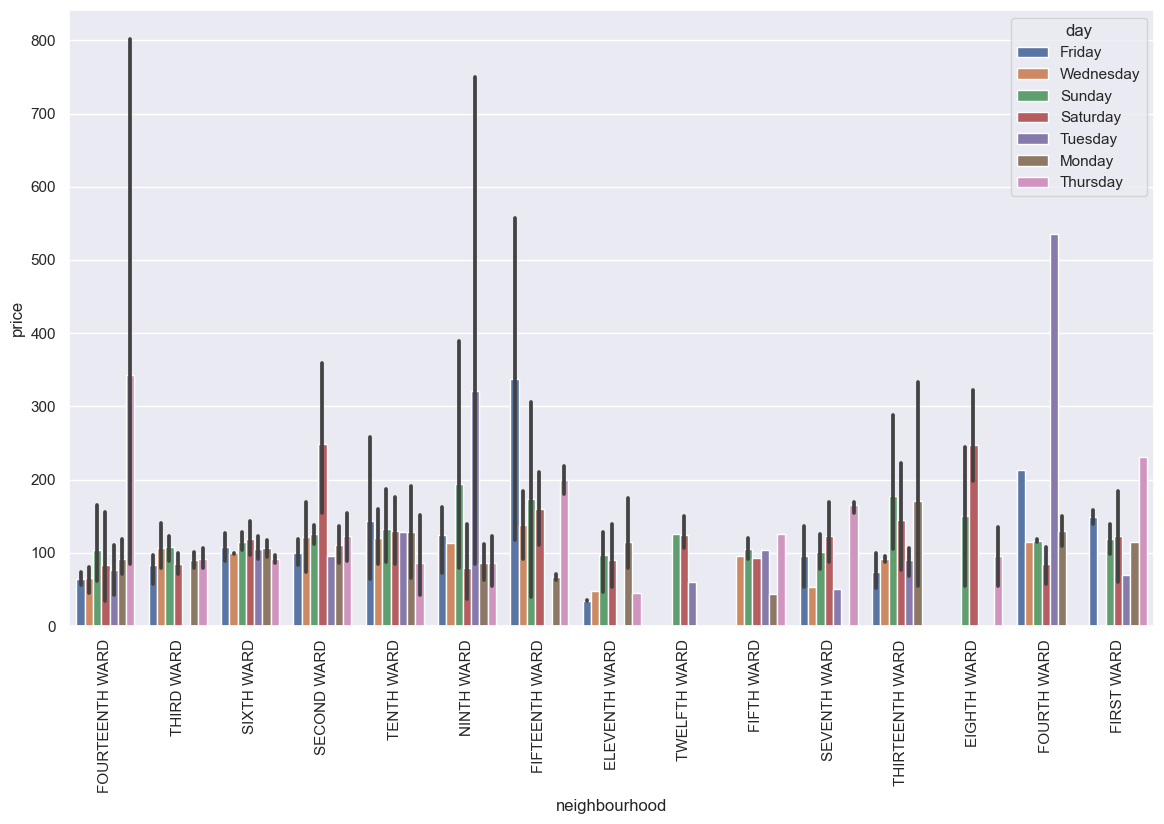

In [57]:
plt.figure(figsize=(14,8))
sns.barplot(data=df ,x= 'neighbourhood', y ='price' ,hue='day')
plt.xticks(rotation=90)
plt.show()